# Problem 1.3

(c) Sketch the graph of $\rho(x)$

$$
    \rho(x) = \sqrt{\frac{\lambda}{\pi}} e^{-\lambda(x-a)^{2}}
$$

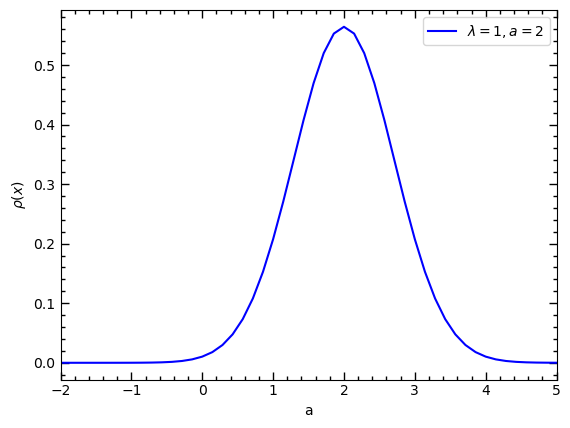

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#import scienceplots
#plt.style.use(['science','ieee'])
#mpl.rcParams['text.usetex'] = False  # Disable LaTeX



def prob_dens(x,l,a):
    return np.sqrt(l/np.pi)*np.exp(-l*(x-a)**2)

num = np.linspace(-2,5)
l = 1
a = 2
min_y = min(prob_dens(num,l,a)) 

#Plot
fig, ax = plt.subplots()
ax.plot(num,prob_dens(num,l,a), color='blue', label = r'$\lambda = 1 , a = 2$')
ax.set_xlabel('a')
ax.set_ylabel(r'$\rho(x)$')
ax.set_xlim(-2,5)
ax.legend()
ax.tick_params(axis='both', which='major', direction='in', length = 6, width = 1, right=True, top=True)
ax.tick_params(axis='both', which='minor', direction='in', length = 3, width = 1, right = True, top = True)
ax.minorticks_on()
#plt.savefig("ProbDens.png")
plt.show()




# Problem 1.4

(b) Sketch $\psi(x,0)$, as a function of $x$

$$
    \psi(x,0) = \begin{cases} \sqrt{\frac{3}{b}}(x/a), & 0 \leq x \leq a, \\
    \sqrt{\frac{3}{b}}(b-x)/(b-a), & a \leq x \leq b, \\
    0, & \text{Otherwise},
    \end{cases}
$$

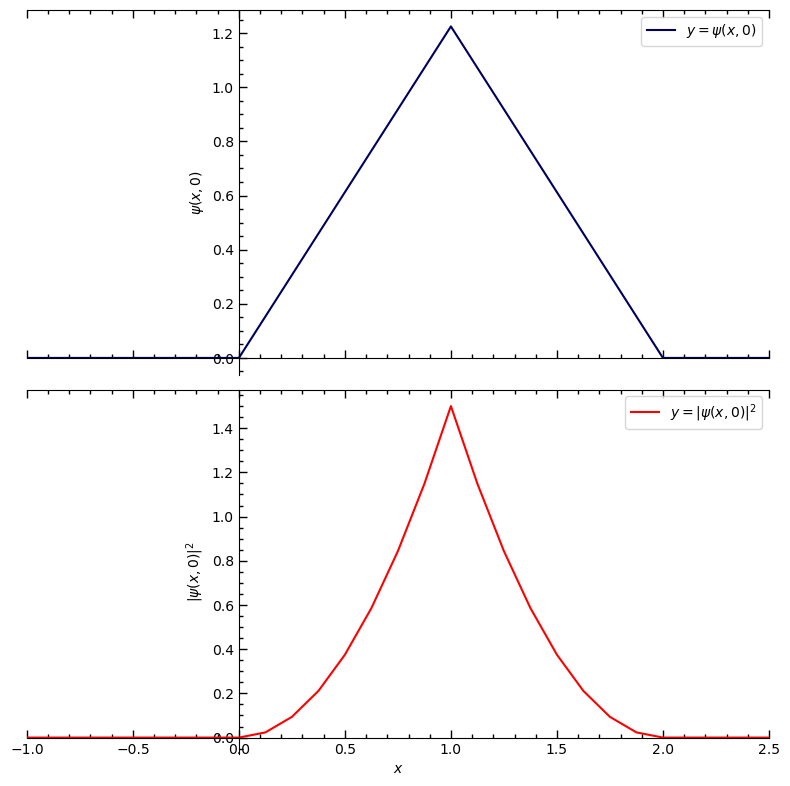

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def wavefunc(x,a,b):
    # Create an output array to store the results
    result = np.zeros_like(x, dtype=float)
    
    # Apply conditions element-wise
    result[(0 <= x) & (x <= a)] = np.sqrt(3/b) * (x[(0 <= x) & (x <= a)] / a)
    result[(a <= x) & (x <= b)] = np.sqrt(3/b) * (b - x[(a <= x) & (x <= b)])/(b-a)
    
    return result


a = 1
b = 2
x_coordinates = np.arange(-3,3,0.125)

plt.figure(figsize=(8,8))
ax1 = plt.subplot(2,1,1)
ax1.plot(x_coordinates,wavefunc(x_coordinates,a,b), color = '#00005c', label =r'$y = \psi(x,0)$' )
ax1.tick_params(axis='both', which='minor', direction='in', length=3, width=1, top=True)
ax1.tick_params(axis='both', which='major', direction='in', length=6, width=1, top=True)
ax1.set_xticklabels([])   # Hides the x-axis
ax1.minorticks_on()
ax1.spines['left'].set_position(('data', 0))
ax1.spines['bottom'].set_position(('data', 0))
ax1.spines['right'].set_color('none')
ax1.set_xlim(-1,2.5)
ax1.set_ylabel(r'$\psi(x,0)$')
ax1.legend()

ax2 = plt.subplot(2,1,2)
ax2.plot(x_coordinates,(wavefunc(x_coordinates,a,b))**2, color = 'red', label =r'$y = |\psi(x,0)|^{2}$')
ax2.tick_params(axis='both', which='major', direction='in', length=6, width=1, top=True)
ax2.tick_params(axis='both', which='minor', direction='in', length=3, width=1, top=True)
ax2.minorticks_on()
ax2.spines['left'].set_position(('data', 0))
ax2.spines['bottom'].set_position(('data', 0))
ax2.spines['right'].set_color('none')
ax2.set_xlim(-1,2.5)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$|\psi(x,0)|^{2}$')
ax2.legend()


#plt.savefig("test.pdf")
plt.tight_layout()
plt.savefig('WaveFunc.pdf')
plt.show()

# Problem 1.5

(c)  Sketching $|\psi|^{2}$, as a function of $x$, mark the points $(\langle x \rangle + \sigma)$ and  $(\langle x \rangle - \sigma)$, to illustrate the sense in which $\sigma$ reprasents the spread in $x$

$$
    |\psi|^{2} = y(x) = \lambda e^{-2\lambda|x|}
$$

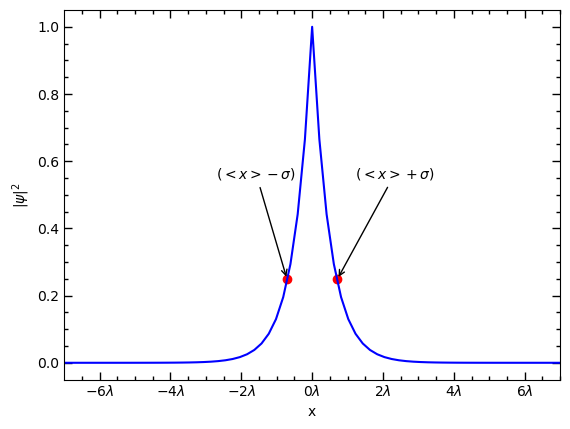

In [69]:
import numpy as np
import matplotlib.pyplot as plt

#Defining the wavefunction
def WaveFunctX(x):
    return np.exp(-2*np.abs(x))

# Generating x-values
l = 1
start = -10
end = 10
num = 99
x_values = np.linspace(start, end, num)

#Defining the standard deviation
Std_dev = 1/np.sqrt(2)

#Plotting the wavefunction
plt.plot(x_values, WaveFunctX(x_values), color='blue', label = r'$\lambda = 1$')
plt.xlabel('x')
plt.ylabel(r'$|\psi|^{2}$')
#Formatting the plot
plt.tick_params(axis='both', which='major', direction='in', length = 6, 
                width = 1, right=True, top=True)
plt.tick_params(axis='both', which='minor', direction='in', length = 3, 
                width = 1, right = True, top = True)

#Marking the points with annotation
desired_x1 = Std_dev
desired_y1 = np.interp(desired_x1, x_values, WaveFunctX(x_values)) #(<x>+Std_dev)
desired_x2 = -Std_dev
desired_y2 = np.interp(desired_x2, x_values, WaveFunctX(x_values)) #(<x>-Std_dev)

plt.scatter(desired_x1, desired_y1, c = "red")
plt.annotate(f'$(<x> +\sigma)$', 
             xy = (desired_x1, desired_y1), 
             xytext=(desired_x1+0.5,desired_y1+0.3),
             arrowprops=dict(facecolor='black', arrowstyle='->')
             )

plt.scatter(desired_x2, desired_y2, c = "red")
plt.annotate(f'$(<x>-\sigma)$', 
             xy = (desired_x2, desired_y2), 
             xytext=(desired_x2-2,desired_y2+0.3),
             arrowprops=dict(facecolor='black', arrowstyle='->')
             )

#Formating the ticks
a=2
plt.xticks(np.arange(-10, 10, 2), [f'${i}\lambda$' for i in np.arange(-10, 10,2)])


plt.xlim(-7,7)
plt.minorticks_on()
plt.show()
